# probabilities
I manually tagged several datasets with true / false detections based on the model to look at the relationship between the probability outputed by the model and the true result based on manual validation.


In [1]:
import pandas as pd

In [2]:
!ls

1C1_tagged.csv	 camera_trap_notebook.ipynb  ic1.csv
1C2_tagged.csv	 combined_data.csv	     ic3.csv
1C3_tagged.csv	 GE24_tagged.csv	     notes_on_csv.txt
1C4_tagged.csv	 GE39_39C5.csv		     runtimes.txt
1C5_tagged.csv	 GE39_39C5_tagged.csv	     summary.ods
1C6_tagged.csv	 GE51_tagged.csv
29C3_tagged.csv  GE53C1_tagged.csv


In [3]:
df_1C1 = pd.read_csv("../camera_trap_images/1C1/detector_summary_1585882519.csv")
df_1C2 = pd.read_csv("../camera_trap_images/1C2/detector_summary_1585897752.csv")
df_1C3 = pd.read_csv("../camera_trap_images/1C3/detector_summary_1585898835.csv")
df_1C4 = pd.read_csv("../camera_trap_images/1C4/detector_summary_1585968490.csv")
df_1C5 = pd.read_csv("../camera_trap_images/1C5/detector_summary_1586070774.csv")
df_1C6 = pd.read_csv("../camera_trap_images/1C6/detector_summary_1586075602.csv")
df_GE39 = pd.read_csv("../camera_trap_images/GE39_39C5/detector_summary_1586089736.csv")
df_GE24 = pd.read_csv("../camera_trap_images/GE24/detector_summary_1585992114.csv")
df_GE51 = pd.read_csv("../camera_trap_images/GE51_51C4_RW98/detector_summary_1586175076.csv")
df_1C1.head()                     

file  max_confidence  #obj  \
0  ../mychanges/camera_trap_images/1C1/GE-1C1_001...           0.991     1   
1  ../mychanges/camera_trap_images/1C1/GE-1C1_001...           0.998     1   
2  ../mychanges/camera_trap_images/1C1/GE-1C1_000...           0.999     1   
3  ../mychanges/camera_trap_images/1C1/GE-1C1_002...           0.991     2   
4  ../mychanges/camera_trap_images/1C1/GE-1C1_000...           0.997     2   

  obj_categories                                             bboxes  
0              1                  [[0.414; 0.3404; 0.1024; 0.2695]]  
1              1                 [[0.2924; 0.5038; 0.2223; 0.2577]]  
2              1                      [[0; 0.2729; 0.9966; 0.7033]]  
3              1  [[0; 0.5044; 0.08292; 0.3506]; [0.4764; 0.1678...  
4            1/2  [[0.01343; 0.2052; 0.5962; 0.7752]; [0.0375; 0...

In [8]:
len(df_1C1['max_confidence'])#.hist()

555

In [5]:
import matplotlib.pyplot as plt

/home/dwheeler/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


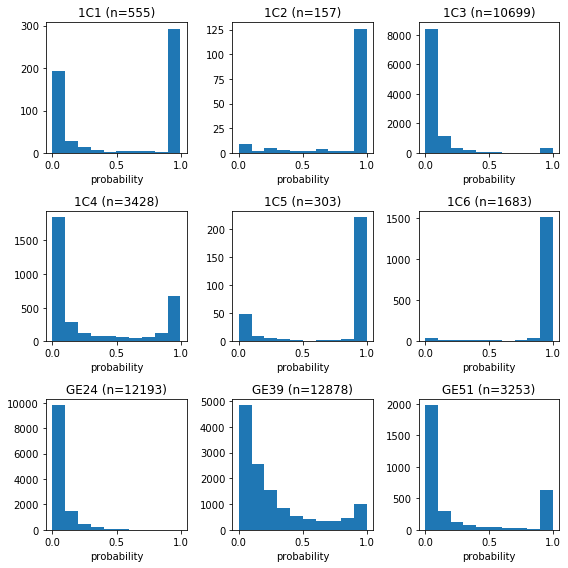

In [9]:
fig, axis = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
axis[0,0].set_title('1C1 (n=%s)' % len(df_1C1))
axis[0,0].hist(df_1C1['max_confidence'])
axis[0,0].set_xlabel('probability')

axis[0,1].set_title('1C2 (n=%s)' % len(df_1C2))
axis[0,1].hist(df_1C2['max_confidence'])
axis[0,1].set_xlabel('probability')

axis[0,2].set_title('1C3 (n=%s)' % len(df_1C3))
axis[0,2].hist(df_1C3['max_confidence'])
axis[0,2].set_xlabel('probability')

axis[1,0].set_title('1C4 (n=%s)' % len(df_1C4))
axis[1,0].hist(df_1C4['max_confidence'])
axis[1,0].set_xlabel('probability')

axis[1,1].set_title('1C5 (n=%s)' % len(df_1C5))
axis[1,1].hist(df_1C5['max_confidence'])
axis[1,1].set_xlabel('probability')

axis[1,2].set_title('1C6 (n=%s)' % len(df_1C6))
axis[1,2].hist(df_1C6['max_confidence'])
axis[1,2].set_xlabel('probability')

axis[2,0].set_title('GE24 (n=%s)' % len(df_GE24))
axis[2,0].hist(df_GE24['max_confidence'])
axis[2,0].set_xlabel('probability')

axis[2,1].set_title('GE39 (n=%s)' % len(df_GE39))
axis[2,1].hist(df_GE39['max_confidence'])
axis[2,1].set_xlabel('probability')

axis[2,2].set_title('GE51 (n=%s)' % len(df_GE51))
axis[2,2].hist(df_GE51['max_confidence'])
axis[2,2].set_xlabel('probability')

fig.tight_layout()
plt.savefig('../figs/prob_hist.png', dpi=300)
fig.show()

I want the plots ordered by probability along x axis with the prob on the y axis

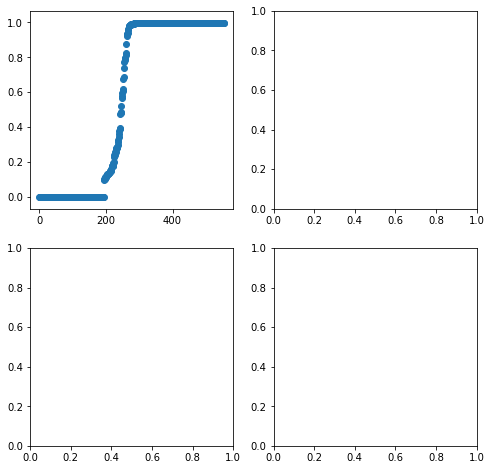

In [10]:
import numpy as np
df_1C1_res = pd.read_csv('ic1.csv')
df_1C1_res = df_1C1_res.sort_values('max_confidence', ignore_index=True) 
df_1C1_res['ix'] = df_1C1_res.index
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

axis[0,0].scatter(df_1C1_res.index , df_1C1_res['max_confidence'])
#axis[0,1].scatter(test['ix'], test['max_confidence'])



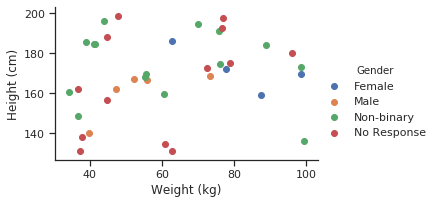

In [11]:
import seaborn
seaborn.set(style='ticks')

np.random.seed(0)
N = 37
_genders= ['Female', 'Male', 'Non-binary', 'No Response']
df = pd.DataFrame({
    'Height (cm)': np.random.uniform(low=130, high=200, size=N),
    'Weight (kg)': np.random.uniform(low=30, high=100, size=N),
    'Gender': np.random.choice(_genders, size=N)
})

fg = seaborn.FacetGrid(data=df, hue='Gender', hue_order=_genders, aspect=1.61)
fg.map(plt.scatter, 'Weight (kg)', 'Height (cm)').add_legend()

In [16]:
df_1C1_res.columnsd()

file  max_confidence result  \
0  ../mychanges/camera_trap_images/1C1/GE-1C1_004...             0.0     TN   
1  ../mychanges/camera_trap_images/1C1/GE-1C1_003...             0.0     TN   
2  ../mychanges/camera_trap_images/1C1/GE-1C1_003...             0.0     TN   
3  ../mychanges/camera_trap_images/1C1/GE-1C1_003...             0.0     TN   
4  ../mychanges/camera_trap_images/1C1/GE-1C1_004...             0.0     TN   

   #obj obj_categories bboxes  ix  
0     0              0     []   0  
1     0              0     []   1  
2     0              0     []   2  
3     0              0     []   3  
4     0              0     []   4

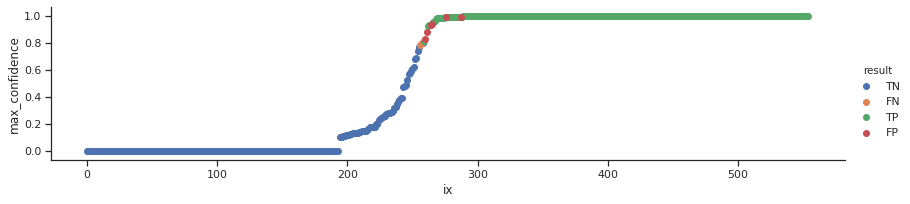

In [12]:
fg = seaborn.FacetGrid(data=df_1C1_res, hue='result', aspect=4)
fg.map(plt.scatter, 'ix', 'max_confidence').add_legend()

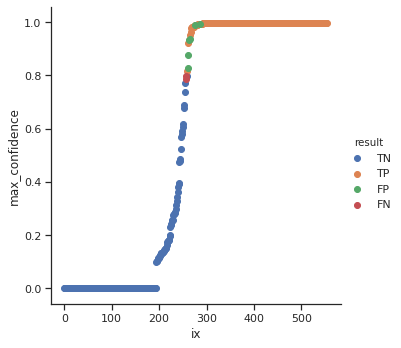

In [13]:
df_1C1_res = pd.read_csv('ic1.csv')
df_1C1_res = df_1C1_res.sort_values('max_confidence', ignore_index=True) 
df_1C1_res['ix'] = df_1C1_res.index

order = ['TN','TP','FP','FN']

fg = seaborn.FacetGrid(data=df_1C1_res, hue='result', hue_order=order, height=5, aspect=1)
fg.map(plt.scatter, 'ix', 'max_confidence').add_legend()
fg.savefig('../figs/1C1.prob.png', dpi=300)

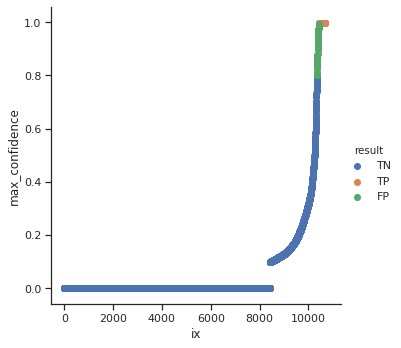

In [14]:
df_1C3_res = pd.read_csv('ic3.csv')
df_1C3_res = df_1C3_res.sort_values('max_confidence', ignore_index=True) 
df_1C3_res['ix'] = df_1C3_res.index

order = ['TN','TP','FP']

fg = seaborn.FacetGrid(data=df_1C3_res, hue='result', hue_order=order,height=5, aspect=1)
fg.map(plt.scatter, 'ix', 'max_confidence').add_legend()
fg.savefig('../figs/1C3.prob.png', dpi=300)

In [28]:
!ls

camera_trap_notebook.ipynb  ic1.csv  notes_on_csv.txt  summary.ods
GE39_39C5.csv		    ic3.csv  runtimes.txt


The plot below does not include false negative results!!!

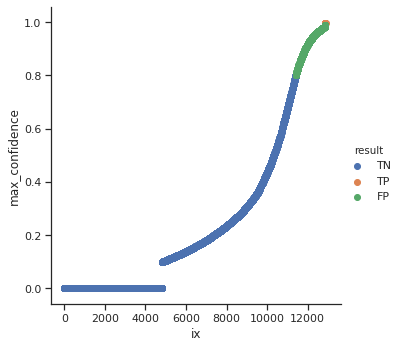

In [15]:
df_GE39_res = pd.read_csv('GE39_39C5.csv')
df_GE39_res = df_GE39_res.sort_values('max_confidence', ignore_index=True) 
df_GE39_res['ix'] = df_GE39_res.index
order = ['TN','TP','FP']
fg = seaborn.FacetGrid(data=df_GE39_res, hue='result',hue_order=order, height=5, aspect=1)
fg.map(plt.scatter, 'ix', 'max_confidence').add_legend()
fg.savefig('../figs/GE39.prob.png', dpi=300)

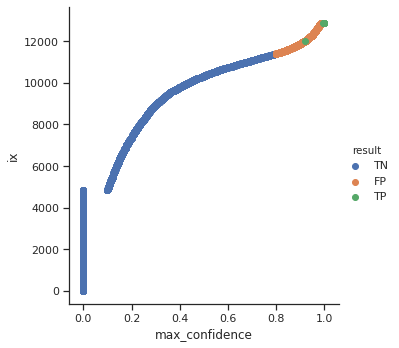

In [16]:
df_GE39_res = pd.read_csv('GE39_39C5.csv')
df_GE39_res = df_GE39_res.sort_values('max_confidence', ignore_index=True) 
df_GE39_res['ix'] = df_GE39_res.index
order = ['TN','TP','FP']
fg = seaborn.FacetGrid(data=df_GE39_res, hue='result', height=5, aspect=1)
fg.map(plt.scatter,'max_confidence','ix').add_legend()

In [5]:
!ls *_tagged.csv

1C1_tagged.csv	1C4_tagged.csv	29C3_tagged.csv       GE51_tagged.csv
1C2_tagged.csv	1C5_tagged.csv	GE24_tagged.csv       GE53C1_tagged.csv
1C3_tagged.csv	1C6_tagged.csv	GE39_39C5_tagged.csv


In [17]:
df_1C1 = pd.read_csv("1C1_tagged.csv")
df_1C2 = pd.read_csv("1C2_tagged.csv")
df_1C3 = pd.read_csv("1C3_tagged.csv")
df_1C4 = pd.read_csv("1C4_tagged.csv")
df_1C5 = pd.read_csv("1C5_tagged.csv")
df_1C6 = pd.read_csv("1C6_tagged.csv")
df_29C3 = pd.read_csv("29C3_tagged.csv")
df_GE24 = pd.read_csv("GE24_tagged.csv")
df_GE39 = pd.read_csv("GE39_39C5_tagged.csv")
df_GE51 = pd.read_csv("GE51_tagged.csv")
df_GE53 = pd.read_csv("GE53C1_tagged.csv")

In [18]:
import matplotlib.pyplot as plt

/home/dwheeler/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


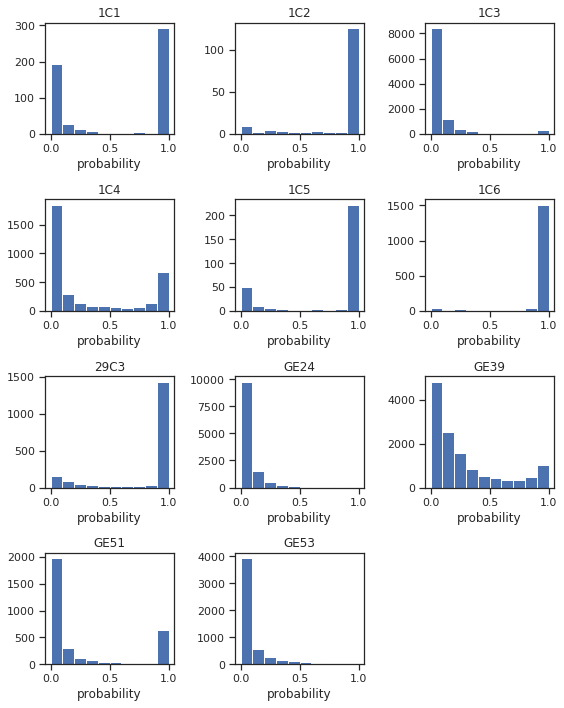

In [150]:
fig, axis = plt.subplots(nrows=4, ncols=3, figsize=(8, 10))
axis[0,0].set_title('1C1')
axis[0,0].hist(df_1C1['max_confidence'])
axis[0,0].set_xlabel('probability')

axis[0,1].set_title('1C2')
axis[0,1].hist(df_1C2['max_confidence'])
axis[0,1].set_xlabel('probability')

axis[0,2].set_title('1C3')
axis[0,2].hist(df_1C3['max_confidence'])
axis[0,2].set_xlabel('probability')

axis[1,0].set_title('1C4')
axis[1,0].hist(df_1C4['max_confidence'])
axis[1,0].set_xlabel('probability')

axis[1,1].set_title('1C5')
axis[1,1].hist(df_1C5['max_confidence'])
axis[1,1].set_xlabel('probability')

axis[1,2].set_title('1C6')
axis[1,2].hist(df_1C6['max_confidence'])
axis[1,2].set_xlabel('probability')

axis[2,0].set_title('29C3')
axis[2,0].hist(df_29C3['max_confidence'])
axis[2,0].set_xlabel('probability')

axis[2,1].set_title('GE24')
axis[2,1].hist(df_GE24['max_confidence'])
axis[2,1].set_xlabel('probability')

axis[2,2].set_title('GE39')
axis[2,2].hist(df_GE39['max_confidence'])
axis[2,2].set_xlabel('probability')

axis[3,0].set_title('GE51')
axis[3,0].hist(df_GE51['max_confidence'])
axis[3,0].set_xlabel('probability')

axis[3,1].set_title('GE53')
axis[3,1].hist(df_GE53['max_confidence'])
axis[3,1].set_xlabel('probability')


axis[3,2].axis('off')

fig.tight_layout()
plt.savefig('../figs/prob_hist.png', dpi=300)
fig.show()

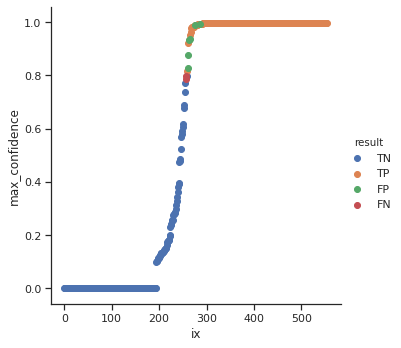

In [19]:
df_1C1_res = pd.read_csv('ic1.csv')
df_1C1_res = df_1C1_res.sort_values('max_confidence', ignore_index=True) 
df_1C1_res['ix'] = df_1C1_res.index

order = ['TN','TP','FP','FN']

fg = seaborn.FacetGrid(data=df_1C1_res, hue='result', hue_order=order, height=5, aspect=1)
fg.map(plt.scatter, 'ix', 'max_confidence').add_legend()
fg.savefig('../figs/1C1.prob.png', dpi=300)

In [16]:
df_1C1.head()

file  max_confidence result  \
0  ../mychanges/camera_trap_images/1C1/GE-1C1_001...           0.991     TP   
1  ../mychanges/camera_trap_images/1C1/GE-1C1_001...           0.998     TP   
2  ../mychanges/camera_trap_images/1C1/GE-1C1_000...           0.999     TP   
3  ../mychanges/camera_trap_images/1C1/GE-1C1_002...           0.991     TP   
4  ../mychanges/camera_trap_images/1C1/GE-1C1_000...           0.997     TP   

               species_name  #obj obj_categories  \
0  Northern Brown Bandicoot     1              1   
1            Northern Quoll     1              1   
2            Torresian Crow     1              1   
3  Northern Brown Bandicoot     2              1   
4            Torresian Crow     2            1/2   

                                              bboxes  
0                  [[0.414; 0.3404; 0.1024; 0.2695]]  
1                 [[0.2924; 0.5038; 0.2223; 0.2577]]  
2                      [[0; 0.2729; 0.9966; 0.7033]]  
3  [[0; 0.5044; 0.08292; 0.3506]; [0.4764; 0.1678...  
4  [[0.01343; 0.2052; 0.5962; 0.7752]; [0.0375; 0...

In [20]:
df_1C1.sort_values('max_confidence', inplace=True, ignore_index=True) 
df_1C1['ix'] = df_1C1.index
df_1C1.head()

file  max_confidence result  \
0  ../mychanges/camera_trap_images/1C1/GE-1C1_004...             0.0     TN   
1  ../mychanges/camera_trap_images/1C1/GE-1C1_003...             0.0     TN   
2  ../mychanges/camera_trap_images/1C1/GE-1C1_005...             0.0     TN   
3  ../mychanges/camera_trap_images/1C1/GE-1C1_003...             0.0     TN   
4  ../mychanges/camera_trap_images/1C1/GE-1C1_003...             0.0     TN   

  species_name  #obj obj_categories bboxes  ix  
0          NaN     0              0     []   0  
1          NaN     0              0     []   1  
2          NaN     0              0     []   2  
3          NaN     0              0     []   3  
4          NaN     0              0     []   4

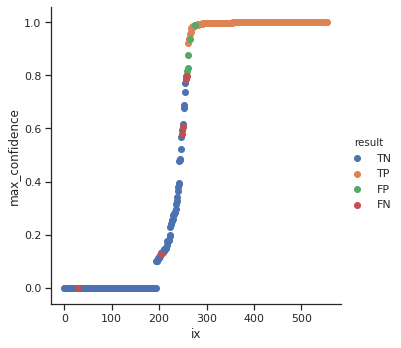

In [21]:
import seaborn as sns
seaborn.set(style='ticks')

order = ['TN','TP','FP','FN']

fg = sns.FacetGrid(data=df_1C1, hue='result', hue_order=order, height=5, aspect=1)
fg.map(plt.scatter, 'ix', 'max_confidence').add_legend()
fg.savefig('../figs/1C1.prob.png', dpi=300)

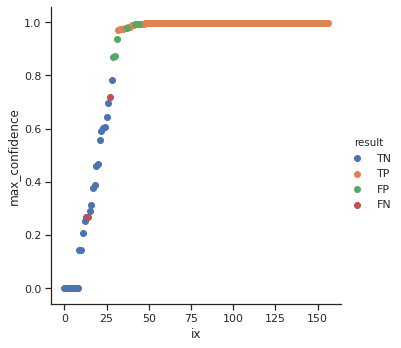

In [22]:
df_1C2.sort_values('max_confidence', inplace=True, ignore_index=True) 
df_1C2['ix'] = df_1C2.index

fg = sns.FacetGrid(data=df_1C2, hue='result', hue_order=order, height=5, aspect=1)
fg.map(plt.scatter, 'ix', 'max_confidence').add_legend()
fg.savefig('../figs/1C2.prob.png', dpi=300)

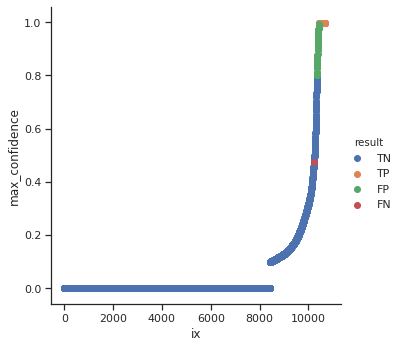

In [23]:
df_1C3.sort_values('max_confidence', inplace=True, ignore_index=True) 
df_1C3['ix'] = df_1C3.index

fg = sns.FacetGrid(data=df_1C3, hue='result', hue_order=order, height=5, aspect=1)
fg.map(plt.scatter, 'ix', 'max_confidence').add_legend()
fg.savefig('../figs/1C3.prob.png', dpi=300)

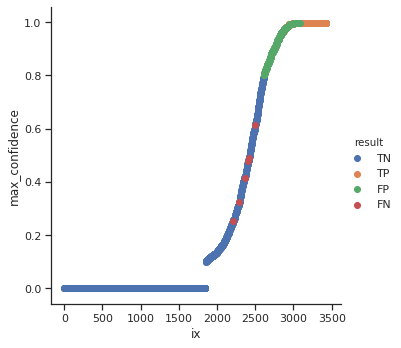

In [24]:
df_1C4.sort_values('max_confidence', inplace=True, ignore_index=True) 
df_1C4['ix'] = df_1C4.index

fg = sns.FacetGrid(data=df_1C4, hue='result', hue_order=order, height=5, aspect=1)
fg.map(plt.scatter, 'ix', 'max_confidence').add_legend()
fg.savefig('../figs/1C4.prob.png', dpi=300)

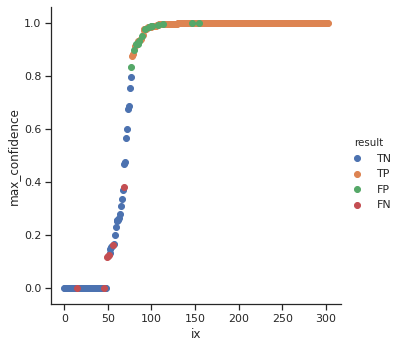

In [25]:
df_1C5.sort_values('max_confidence', inplace=True, ignore_index=True) 
df_1C5['ix'] = df_1C5.index

fg = sns.FacetGrid(data=df_1C5, hue='result', hue_order=order, height=5, aspect=1)
fg.map(plt.scatter, 'ix', 'max_confidence').add_legend()
fg.savefig('../figs/1C5.prob.png', dpi=300)

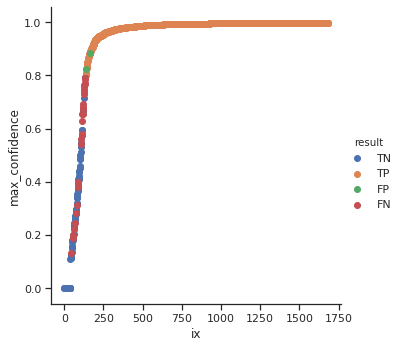

In [26]:
df_1C6.sort_values('max_confidence', inplace=True, ignore_index=True) 
df_1C6['ix'] = df_1C6.index

fg = sns.FacetGrid(data=df_1C6, hue='result', hue_order=order, height=5, aspect=1)
fg.map(plt.scatter, 'ix', 'max_confidence').add_legend()
fg.savefig('../figs/1C6.prob.png', dpi=300)

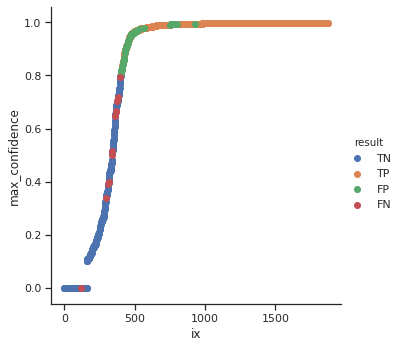

In [27]:
#axis[2,0].set_title('29C3')
#axis[2,1].set_title('GE24')
#axis[2,2].set_title('GE39')
#axis[3,0].set_title('GE51')
#axis[3,1].set_title('GE53')

df_29C3.sort_values('max_confidence', inplace=True, ignore_index=True) 
df_29C3['ix'] = df_29C3.index

fg = sns.FacetGrid(data=df_29C3, hue='result', hue_order=order, height=5, aspect=1)
fg.map(plt.scatter, 'ix', 'max_confidence').add_legend()
fg.savefig('../figs/29C3.prob.png', dpi=300)

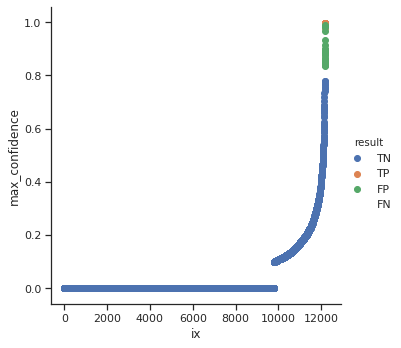

In [28]:
#axis[2,0].set_title('29C3')
#axis[2,1].set_title('GE24')
#axis[2,2].set_title('GE39')
#axis[3,0].set_title('GE51')
#axis[3,1].set_title('GE53')

df_GE24.sort_values('max_confidence', inplace=True, ignore_index=True) 
df_GE24['ix'] = df_GE24.index

fg = sns.FacetGrid(data=df_GE24, hue='result', hue_order=order, height=5, aspect=1)
fg.map(plt.scatter, 'ix', 'max_confidence').add_legend()
fg.savefig('../figs/GE24.prob.png', dpi=300)

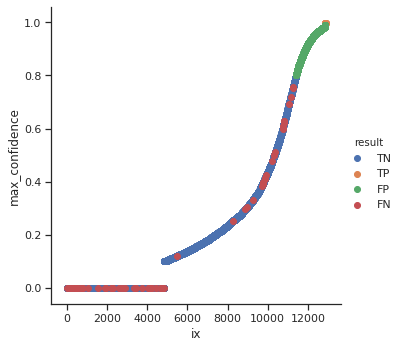

In [29]:
#axis[2,0].set_title('29C3')
#axis[2,1].set_title('GE24')
#axis[2,2].set_title('GE39')
#axis[3,0].set_title('GE51')
#axis[3,1].set_title('GE53')

df_GE39.sort_values('max_confidence', inplace=True, ignore_index=True) 
df_GE39['ix'] = df_GE39.index

fg = sns.FacetGrid(data=df_GE39, hue='result', hue_order=order, height=5, aspect=1)
fg.map(plt.scatter, 'ix', 'max_confidence').add_legend()
fg.savefig('../figs/GE39.prob.png', dpi=300)

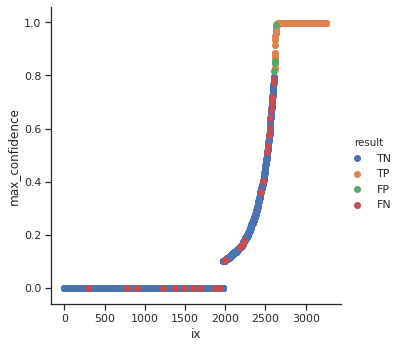

In [30]:
#axis[2,0].set_title('29C3')
#axis[2,1].set_title('GE24')
#axis[2,2].set_title('GE39')
#axis[3,0].set_title('GE51')
#axis[3,1].set_title('GE53')

df_GE51.sort_values('max_confidence', inplace=True, ignore_index=True) 
df_GE51['ix'] = df_GE51.index

fg = sns.FacetGrid(data=df_GE51, hue='result', hue_order=order, height=5, aspect=1)
fg.map(plt.scatter, 'ix', 'max_confidence').add_legend()
fg.savefig('../figs/GE51.prob.png', dpi=300)

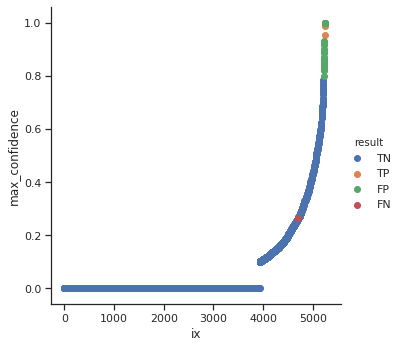

In [31]:
#axis[3,1].set_title('GE53')

df_GE53.sort_values('max_confidence', inplace=True, ignore_index=True) 
df_GE53['ix'] = df_GE53.index

fg = sns.FacetGrid(data=df_GE53, hue='result', hue_order=order, height=5, aspect=1)
fg.map(plt.scatter, 'ix', 'max_confidence').add_legend()
fg.savefig('../figs/GE53.prob.png', dpi=300)

In [32]:
df_1C1['dataset'] = '1C1'
df_1C1.head()

file  max_confidence result  \
0  ../mychanges/camera_trap_images/1C1/GE-1C1_004...             0.0     TN   
1  ../mychanges/camera_trap_images/1C1/GE-1C1_003...             0.0     TN   
2  ../mychanges/camera_trap_images/1C1/GE-1C1_005...             0.0     TN   
3  ../mychanges/camera_trap_images/1C1/GE-1C1_003...             0.0     TN   
4  ../mychanges/camera_trap_images/1C1/GE-1C1_003...             0.0     TN   

  species_name  #obj obj_categories bboxes  ix dataset  
0          NaN     0              0     []   0     1C1  
1          NaN     0              0     []   1     1C1  
2          NaN     0              0     []   2     1C1  
3          NaN     0              0     []   3     1C1  
4          NaN     0              0     []   4     1C1

In [33]:
df_1C2['dataset'] = '1C2'
df_1C3['dataset'] = '1C3'
df_1C4['dataset'] = '1C4'
df_1C5['dataset'] = '1C5'
df_1C6['dataset'] = '1C6'
df_29C3['dataset'] = '29C3'
df_GE24['dataset'] = 'GE24'
df_GE39['dataset'] = 'GE39'
df_GE51['dataset'] = 'GE51'
df_GE53['dataset'] = 'GE53'

In [34]:
frames = [df_1C1, df_1C2, df_1C3, df_1C4, df_1C5, df_1C6, df_29C3, df_GE24, df_GE39, df_GE51, df_GE53]
combined = pd.concat(frames)

In [51]:
combined.head()

file  max_confidence result  \
0  ../mychanges/camera_trap_images/1C1/GE-1C1_004...             0.0     TN   
1  ../mychanges/camera_trap_images/1C1/GE-1C1_004...             0.0     TN   
2  ../mychanges/camera_trap_images/1C1/GE-1C1_005...             0.0     TN   
3  ../mychanges/camera_trap_images/1C1/GE-1C1_003...             0.0     TN   
4  ../mychanges/camera_trap_images/1C1/GE-1C1_005...             0.0     TN   

  species_name  #obj obj_categories bboxes  ix dataset  
0          NaN     0              0     []   0     1C1  
1          NaN     0              0     []   1     1C1  
2          NaN     0              0     []   2     1C1  
3          NaN     0              0     []   3     1C1  
4          NaN     0              0     []   4     1C1

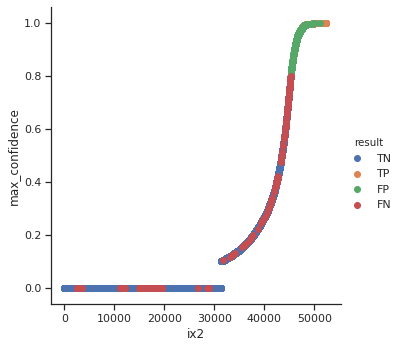

In [52]:
combined.sort_values('max_confidence', inplace=True, ignore_index=True) 
combined['ix2'] = combined.index

fg = sns.FacetGrid(data=combined, hue='result', hue_order=order, height=5, aspect=1)
fg.map(plt.scatter, 'ix2', 'max_confidence').add_legend()
#fg.savefig('../figs/GE53.prob.png', dpi=300)

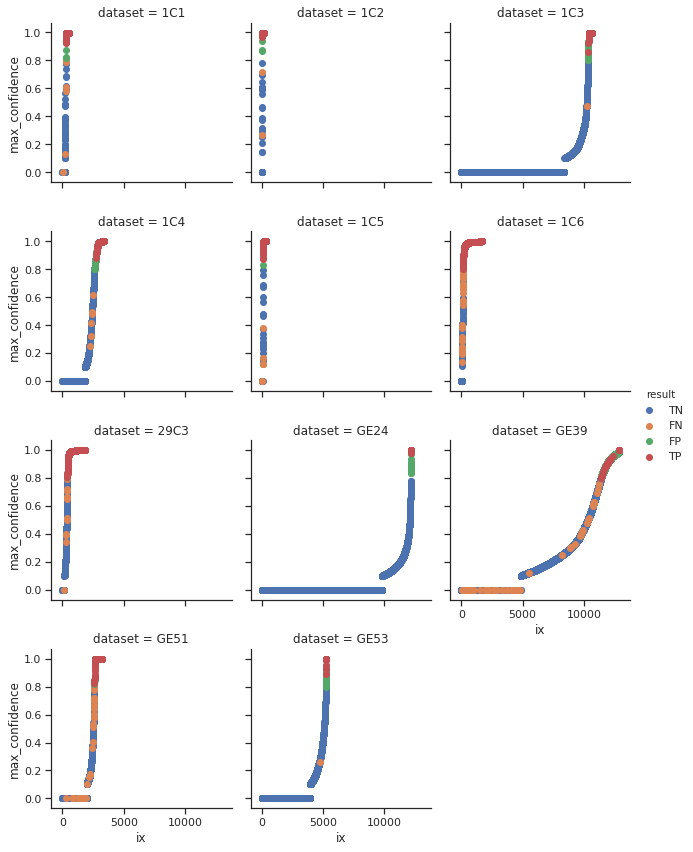

In [35]:
g = sns.FacetGrid(combined, col="dataset", hue="result", col_wrap=3)
g.map(plt.scatter, "ix", "max_confidence")
g.add_legend();
g.savefig("../figs/prob_plots_combined1.png", dpi=300)

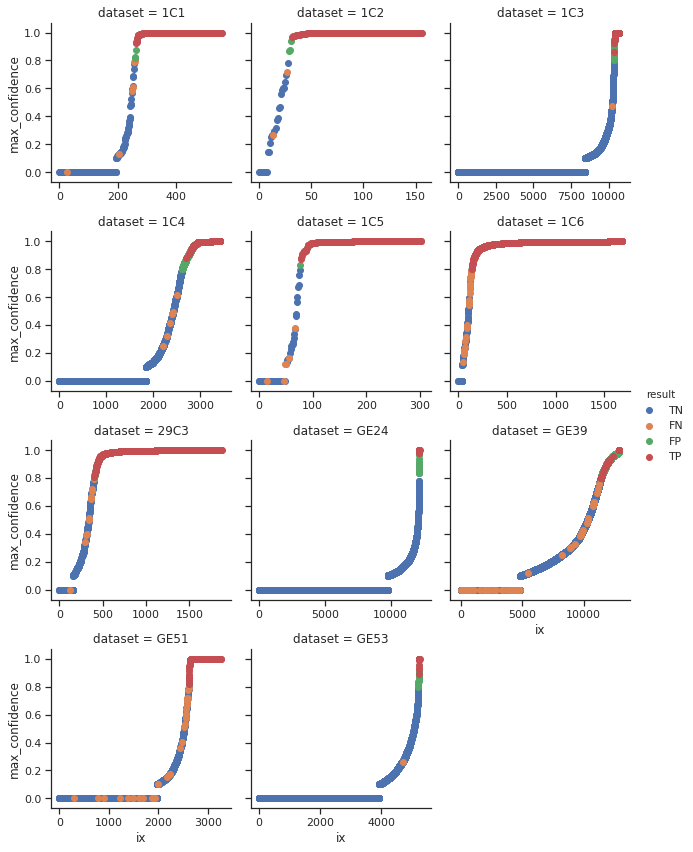

In [36]:
g = sns.FacetGrid(combined, col="dataset", hue="result", col_wrap=3, sharex=False)
g.map(plt.scatter, "ix", "max_confidence")
g.add_legend();
g.savefig("../figs/prob_plots_combined2.png", dpi=300)

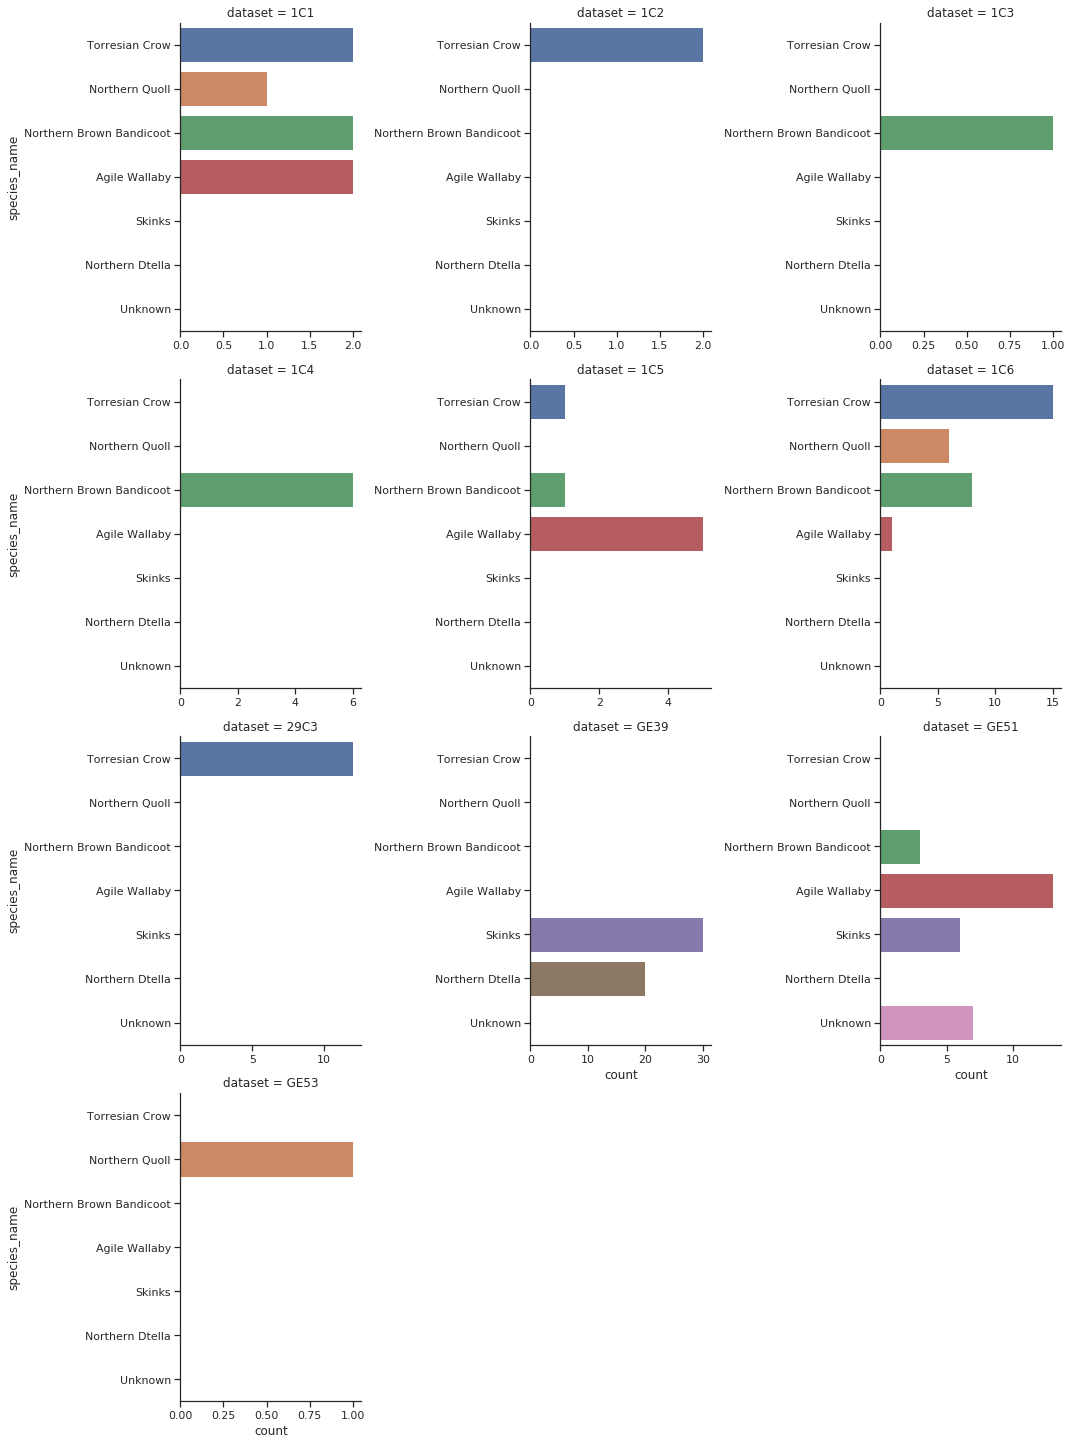

In [147]:
#g = sns.FacetGrid(combined, col="dataset", col_wrap=3,sharex=False)
#g.map(sns.countplot, "species_name")#, "result")
targets = ['FN']
combined_fn = combined[combined.result.isin(targets)]
g = sns.catplot(y="species_name", col="dataset",
                data=combined_fn, kind="count", col_wrap=3,sharey=False, sharex=False)
g.savefig('../figs/false_negative_only_species_dist.png', dpi=300)

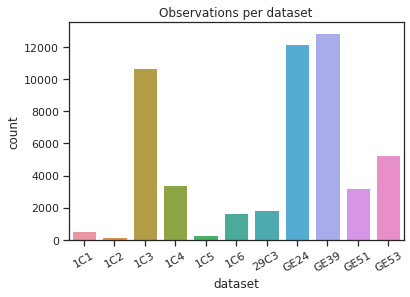

In [38]:
seaborn.set(style='ticks')
ax = sns.countplot(x='dataset',data=combined)
ax.set_title('Observations per dataset')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
fig = ax.get_figure()
fig.savefig('../figs/total_obs_per_dataset.png', dpi=300)

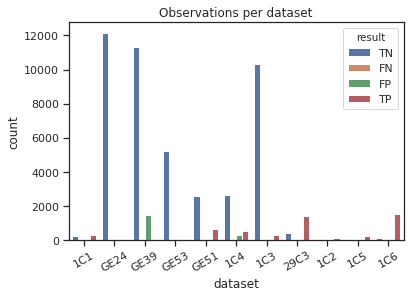

In [110]:
# not a very good figure
seaborn.set(style='ticks')
ax = sns.countplot(x='dataset',data=combined, hue='result')
ax.set_title('Observations per dataset')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
fig = ax.get_figure()


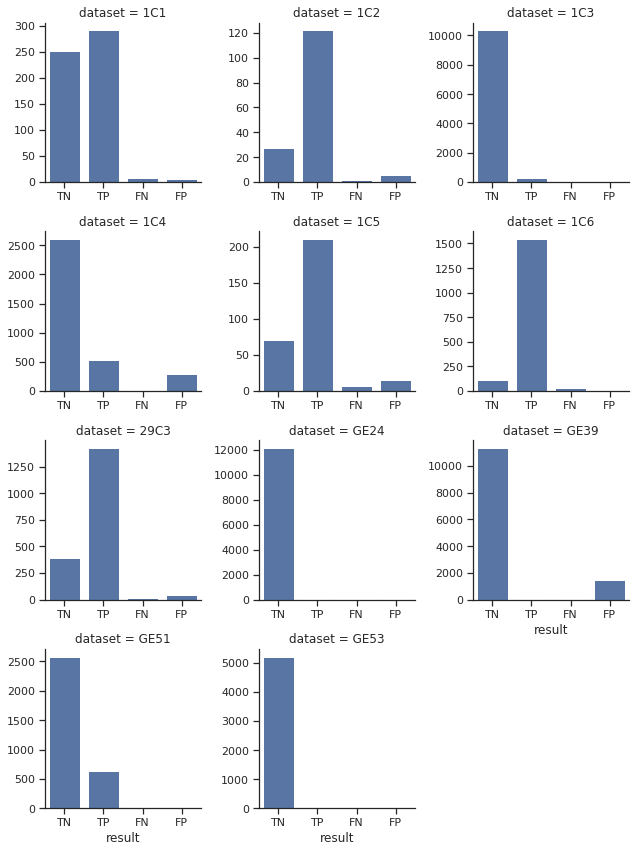

In [39]:
order = ['TN','TP','FN','FP']
g = sns.FacetGrid(combined, col="dataset", col_wrap=3,sharey=False, sharex=False)
g.map(sns.countplot, "result", order=order)#, "result")
g.savefig('../figs/result_count_alldata.png', dpi=300)

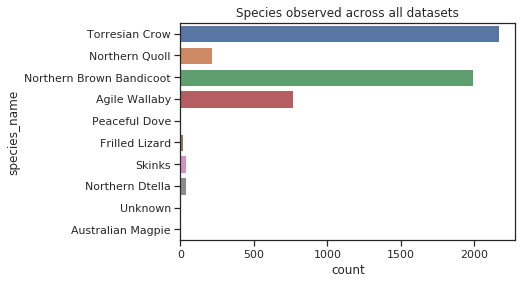

In [149]:
ax = sns.countplot(y='species_name',data=combined)
ax.set_title('Species observed across all datasets')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
fig = ax.get_figure()
fig.savefig('../figs/total_species_obs.png',bbox_inches='tight', dpi=300)

What about ratio of TP:FN to give an idea of what species are more likely to be observed versus missed by the AI.

In [43]:
# totals
combined.groupby('result')['dataset'].count()

result
FN      148
FP     1914
TN    45104
TP     5108
Name: dataset, dtype: int64

In [50]:
combined.groupby(['dataset','result'])['dataset'].count()

dataset  result
1C1      FN            7
         FP            5
         TN          252
         TP          291
1C2      FN            2
         FP            6
         TN           27
         TP          122
1C3      FN            1
         FP           65
         TN        10346
         TP          287
1C4      FN            6
         FP          285
         TN         2609
         TP          528
1C5      FN            7
         FP           15
         TN           70
         TP          211
1C6      FN           30
         FP            2
         TN          106
         TP         1545
29C3     FN           12
         FP           45
         TN          389
         TP         1427
GE24     FP           21
         TN        12158
         TP           14
GE39     FN           53
         FP         1445
         TN        11352
         TP           28
GE51     FN           29
         FP            4
         TN         2583
         TP          637
GE53     

**Sensitivity**
TPR = TP / (TP + FN)  

**specificity**
TNR = TN / (TN + FP)

**false negative rate**
FNR = FN / (FN + TP)

**false positive rate**
FPR = FP / (FP + TN)

In [142]:
def tpr(tp, fn):
    return float(tp) / (float(tp) + float(fn))

def tnr(tn, fp):
    return float(tn)/ (float(tn) + float(fp))

def fnr(fn, tp):
    return float(fn) / (float(fn) + float(tp))

def fpr(fp, tn):
    return float(fp) / (float(fp) + float(tn))

def prec(tp, fp):
    return float(tp)/ (float(tp) + float(fp))

In [80]:
#df_1C1
#df_1C2['dataset'] = '1C2'
#df_1C3['dataset'] = '1C3'
#df_1C4['dataset'] = '1C4'
#df_1C5['dataset'] = '1C5'
#df_1C6['dataset'] = '1C6'
#df_29C3['dataset'] = '29C3'
#df_GE24['dataset'] = 'GE24'
#df_GE39['dataset'] = 'GE39'
#df_GE51['dataset'] = 'GE51'
#df_GE53['dataset'] = 'GE53'
res_1C1 = df_1C1.groupby(['result'])['result'].count()
res_1C2 = df_1C2.groupby(['result'])['result'].count()
res_1C3 = df_1C3.groupby(['result'])['result'].count()
res_1C4 = df_1C4.groupby(['result'])['result'].count()
res_1C5 = df_1C5.groupby(['result'])['result'].count()
res_1C6 = df_1C6.groupby(['result'])['result'].count()
res_29C3 = df_29C3.groupby(['result'])['result'].count()
res_GE24 = df_GE24.groupby(['result'])['result'].count()
res_GE39 = df_GE39.groupby(['result'])['result'].count()
res_GE51 = df_GE51.groupby(['result'])['result'].count()
res_GE53 = df_GE53.groupby(['result'])['result'].count()



In [144]:
prec(res['TP'],res['FP'])

0.9831081081081081

In [145]:
keys = []
data = combined.groupby(['dataset','result'])
for key, vals in data.groups:
    if key not in keys:
        keys.append(key)
#trp
tpr_list = []
tp_list = []
tnr_list = []
tn_list = []
fnr_list = []
fn_list = []
fpr_list = []
fp_list = []
prec_list = []
for key in keys:
    #tpr(res['TP'],res['FN'])
    print(key)
    try:
        tp = len(data.groups[(key, 'TP')])
    except KeyError:
        tp = 0
    try:
        fp = len(data.groups[(key, 'FP')])
    except KeyError:
        fp = 0
    try:
        tn = len(data.groups[(key, 'TN')])
    except KeyError:
        tn = 0
    try:
        fn = len(data.groups[(key, 'FN')])
    except KeyError:
        fn = 0
    tp_list.append(tp)
    fp_list.append(fp)
    tn_list.append(tn)
    fn_list.append(fn)
    print('TPR: %.2f' % (tpr(tp,fn)))
    tpr_list.append(tpr(tp,fn))
    print('TNR: %.2f' % (tnr(tn, fp)))
    tnr_list.append(tnr(tn, fp))
    print('FNR: %.2f' % (fnr(fn, tp)))
    fnr_list.append(fnr(fn, tp))
    print('FPR: %.2f' % (fpr(fp, tn)))
    fpr_list.append(fpr(fp, tn))
    print('precision: %.2f' % (prec(tp, fp)))
    prec_list.append(prec(tp, fp))

    

1C1
TPR: 0.98
TNR: 0.98
FNR: 0.02
FPR: 0.02
precision: 0.98
1C2
TPR: 0.98
TNR: 0.82
FNR: 0.02
FPR: 0.18
precision: 0.95
1C3
TPR: 1.00
TNR: 0.99
FNR: 0.00
FPR: 0.01
precision: 0.82
1C4
TPR: 0.99
TNR: 0.90
FNR: 0.01
FPR: 0.10
precision: 0.65
1C5
TPR: 0.97
TNR: 0.82
FNR: 0.03
FPR: 0.18
precision: 0.93
1C6
TPR: 0.98
TNR: 0.98
FNR: 0.02
FPR: 0.02
precision: 1.00
29C3
TPR: 0.99
TNR: 0.90
FNR: 0.01
FPR: 0.10
precision: 0.97
GE24
TPR: 1.00
TNR: 1.00
FNR: 0.00
FPR: 0.00
precision: 0.40
GE39
TPR: 0.35
TNR: 0.89
FNR: 0.65
FPR: 0.11
precision: 0.02
GE51
TPR: 0.96
TNR: 1.00
FNR: 0.04
FPR: 0.00
precision: 0.99
GE53
TPR: 0.95
TNR: 1.00
FNR: 0.05
FPR: 0.00
precision: 0.46


In [146]:
# fnr etc table
print("site<-c(" + ",".join(keys) + ")")
print("TPR<-c(" + ",".join(str(v)[:4] for v in tpr_list) + ")")
print("TNR<-c(" + ",".join(str(v)[:4] for v in tnr_list) + ")")
print("FNR<-c(" + ",".join(str(v)[:4] for v in fnr_list) + ")")
print("FPR<-c(" + ",".join(str(v)[:4] for v in fpr_list) + ")")
print("precision<-c(" + ",".join(str(v)[:4] for v in prec_list) + ")")


site<-c(1C1,1C2,1C3,1C4,1C5,1C6,29C3,GE24,GE39,GE51,GE53)
TPR<-c(0.97,0.98,0.99,0.98,0.96,0.98,0.99,1.0,0.34,0.95,0.94)
TNR<-c(0.98,0.81,0.99,0.90,0.82,0.98,0.89,0.99,0.88,0.99,0.99)
FNR<-c(0.02,0.01,0.00,0.01,0.03,0.01,0.00,0.0,0.65,0.04,0.05)
FPR<-c(0.01,0.18,0.00,0.09,0.17,0.01,0.10,0.00,0.11,0.00,0.00)
precision<-c(0.98,0.95,0.81,0.64,0.93,0.99,0.96,0.4,0.01,0.99,0.46)


In [140]:
# table of tp, fp etc
print("site<-c(" + ",".join(keys) + ")")
print("TP<-c(" + ",".join(str(v) for v in tp_list) + ")")
print("TN<-c(" + ",".join(str(v) for v in tn_list) + ")")
print("FN<-c(" + ",".join(str(v) for v in fn_list) + ")")
print("FP<-c(" + ",".join(str(v) for v in fp_list) + ")")


site<-c(1C1,1C2,1C3,1C4,1C5,1C6,29C3,GE24,GE39,GE51,GE53)
TP<-c(291,122,287,528,211,1545,1427,14,28,637,18)
TN<-c(252,27,10346,2609,70,106,389,12158,11352,2583,5212)
FN<-c(7,2,1,6,7,30,12,0,53,29,1)
FP<-c(5,6,65,285,15,2,45,21,1445,4,21)


In [141]:
len(combined)

52274

In [154]:
r = combined.groupby(['species_name','result'])['result'].count()
r

species_name              result
Agile Wallaby             FN          21
                          TP         747
Australian Magpie         TP           6
Frilled Lizard            TP          18
Northern Brown Bandicoot  FN          21
                          TP        1971
Northern Dtella           FN          20
                          TP          16
Northern Quoll            FN           8
                          TP         205
Peaceful Dove             TP           3
Skinks                    FN          36
Torresian Crow            FN          32
                          TP        2139
Unknown                   FN           7
Name: result, dtype: int64

In [155]:
# would be good to have Skins (n=35) as the x/y label, small nums can distort ratios
r_totals = combined.groupby(['species_name'])['result'].count()


species_name
Agile Wallaby                768
Australian Magpie              6
Frilled Lizard                18
Northern Brown Bandicoot    1992
Northern Dtella               36
Northern Quoll               213
Peaceful Dove                  3
Skinks                        36
Torresian Crow              2171
Unknown                        7
Name: result, dtype: int64

Some attempts at hist of probs across results.

In [160]:
#sns.distplot('max_confidence', hue='result',data=combined)
dTP = combined[combined.result=='TP']
dTN = combined[combined.result=='TN']
dFP = combined[combined.result=='FP']
dFN = combined[combined.result=='FN']

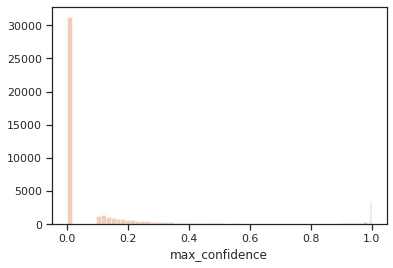

In [162]:
sns.distplot(dTP['max_confidence'], kde=False, label='TP')
sns.distplot(dTN['max_confidence'], kde=False, label='TN')
sns.distplot(dFP['max_confidence'], kde=False, label='FP')
sns.distplot(dFN['max_confidence'], kde=False, label='FN')

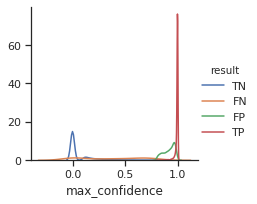

In [165]:
g = distplot_fig(data=combined, x='max_confidence', hue='result')#, col='class')


/home/dwheeler/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


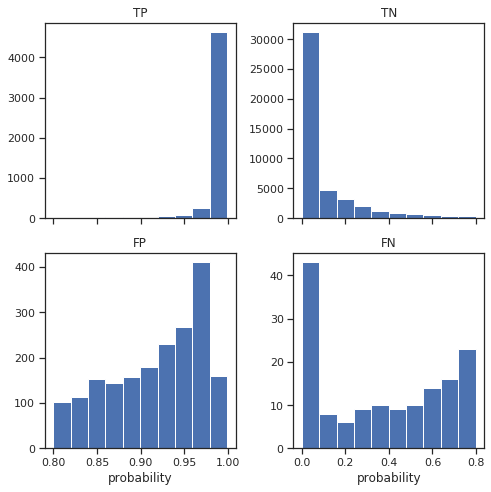

In [198]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))
axis[0,0].set_title('TP')
axis[0,0].hist(dTP['max_confidence'])
#axis[0,0].set_xlim(xmin=0, xmax = 1.0)
axis[0,0].set_xticklabels([])
#axis[0,0].axvline(0.8)
#axis[0,0].set_xlabel('probability')

axis[0, 1].set_title('TN')
axis[0, 1].hist(dTN['max_confidence'])
#axis[0, 1].set_xlabel('probability')
axis[0,1].set_xticklabels([])
axis[1,0].set_title('FP')
axis[1,0].hist(dFP['max_confidence'])
axis[1,0].set_xlabel('probability')

axis[1,1].set_title('FN')
axis[1,1].hist(dFN['max_confidence'])
axis[1,1].set_xlabel('probability')

#axis[3,2].axis('off')

fig.tight_layout()
plt.savefig('../figs/prob_hist_by_result1.png', dpi=300)
fig.show()

/home/dwheeler/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


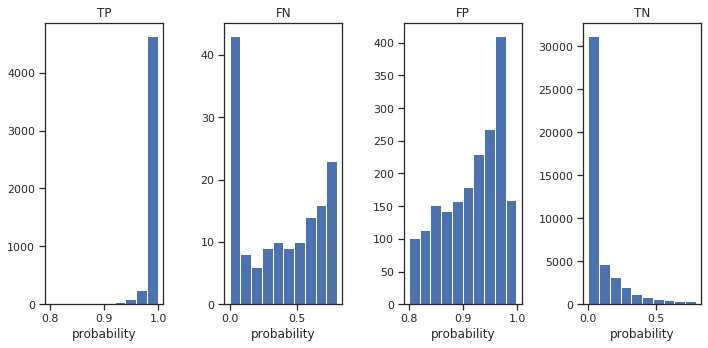

In [179]:
fig, axis = plt.subplots(nrows=1, ncols=4, figsize=(10, 5))
axis[0].set_title('TP')
axis[0].hist(dTP['max_confidence'])
axis[0].set_xlabel('probability')

axis[1].set_title('FN')
axis[1].hist(dFN['max_confidence'])
axis[1].set_xlabel('probability')

axis[2].set_title('FP')
axis[2].hist(dFP['max_confidence'])
axis[2].set_xlabel('probability')

axis[3].set_title('TN')
axis[3].hist(dTN['max_confidence'])
axis[3].set_xlabel('probability')

#axis[3,2].axis('off')

fig.tight_layout()
plt.savefig('../figs/prob_hist_by_result2.png', dpi=300)
fig.show()

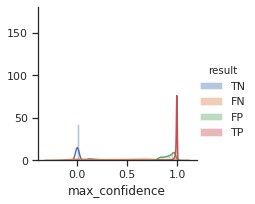

In [186]:
fg = seaborn.FacetGrid(data=combined, hue='result', aspect=1)
fg.map(sns.distplot, 'max_confidence').add_legend()